# Classification

## Imports

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
import sklearn.model_selection as model_selection

from sklearn.model_selection import StratifiedKFold, cross_val_score 
from sklearn.base import clone

plt.rcParams["figure.figsize"] = (5,5)

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [3]:
data_df = pd.read_csv('titanic_train.csv')

In [4]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
y_column = 'Survived'
categorical_variables = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
numerical_variables = ['Age', 'Fare', 'SibSp', 'Parch']

In [7]:
# Categorical Variables - Find unique values and counts
for col in categorical_variables:
    print(f'******** {col}*******')
    print(data_df[col].value_counts())

******** Pclass*******
3    491
1    216
2    184
Name: Pclass, dtype: int64
******** Sex*******
male      577
female    314
Name: Sex, dtype: int64
******** SibSp*******
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
******** Parch*******
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
******** Ticket*******
347082               7
1601                 7
CA. 2343             7
3101295              6
CA 2144              6
                    ..
36963                1
349219               1
345778               1
11771                1
STON/O 2. 3101273    1
Name: Ticket, Length: 681, dtype: int64
******** Cabin*******
B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
F G63          1
C99            1
F E69          1
B73            1
D30            1
Name: Cabin, Length: 147, dtype: int64
******** Embarked*******
S    644
C    168
Q     77
Name: Embarke

In [8]:
print(data_df.Ticket.nunique())
print(data_df.Cabin.nunique())

681
147


In [9]:
y_column = 'Survived'
categorical_variables = ['Pclass', 'Sex', 'Embarked']
numerical_variables = ['Age', 'Fare','SibSp', 'Parch',]

In [10]:
# Find Null values
for col in data_df.columns:
    print('{}: {} Nan values'.format(col, data_df[col].isnull().sum()))

PassengerId: 0 Nan values
Survived: 0 Nan values
Pclass: 0 Nan values
Name: 0 Nan values
Sex: 0 Nan values
Age: 177 Nan values
SibSp: 0 Nan values
Parch: 0 Nan values
Ticket: 0 Nan values
Fare: 0 Nan values
Cabin: 687 Nan values
Embarked: 2 Nan values


In [11]:
# Numerical variables - Coerce and find null values
for col in numerical_variables:
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')
    print('{}: {} Nan values'.format(col, data_df[col].isnull().sum()))

Age: 177 Nan values
Fare: 0 Nan values
SibSp: 0 Nan values
Parch: 0 Nan values


In [12]:
data_df[data_df['Age'].isnull()].sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S


## Data Cleaning

In [13]:
# For age, just impute average value. We can also find correlated features and impute based on that
data_df.loc[data_df['Age'].isnull(), 'Age']=data_df.Age.mean()

In [14]:
# Just select the relevant columns in the dataframe
list_of_cols = [y_column] + categorical_variables + numerical_variables
data_df = data_df[list_of_cols]

In [15]:
# Drop any rows with nulls
data_df = data_df.dropna()

In [16]:
# Find if there are any duplicated information
data_df.duplicated().sum()

111

In [17]:
# Drop rows with duplciated information
data_df.drop_duplicates(inplace=True)

## Feature and Target Exploration

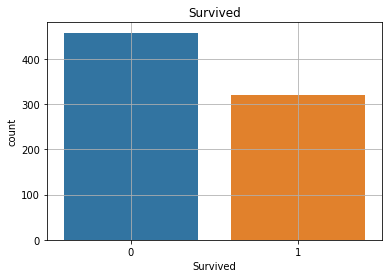

Percentage survived is 0.41
Percentage not survived is 0.59


In [18]:
# Target Variables
plt.figure()
plt.title(y_column)
sns.countplot(data=data_df, x=y_column)
plt.grid(b=True)
plt.show()
N = len(data_df)
print('Percentage survived is {:.2f}'.format((data_df[y_column]==1).sum()/N))
print('Percentage not survived is {:.2f}'.format((data_df[y_column]==0).sum()/N))

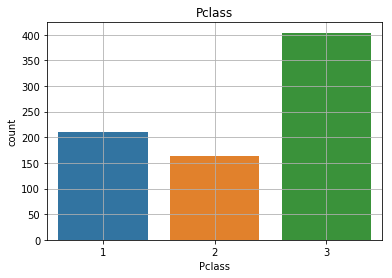

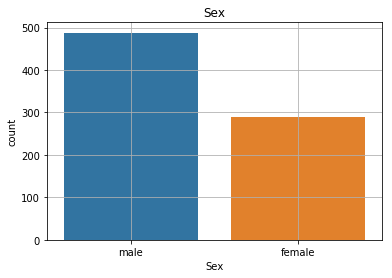

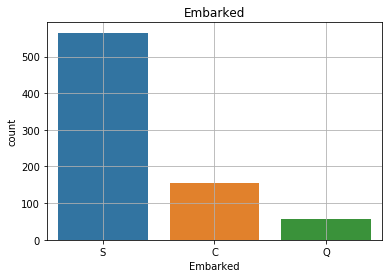

In [19]:
# Distribution of categorical variables
for col in categorical_variables:
    plt.figure()
    plt.title(col)
    sns.countplot(data=data_df, x=col)
    plt.grid(b=True)
plt.show()

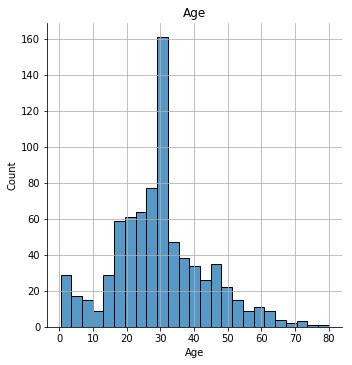

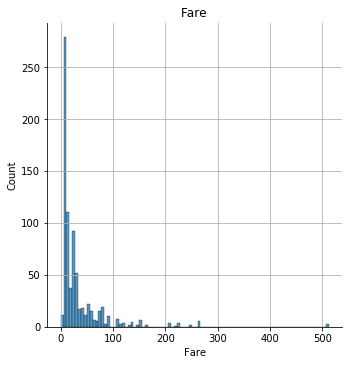

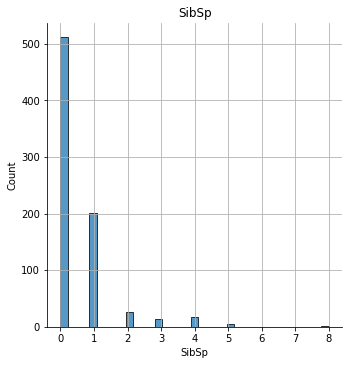

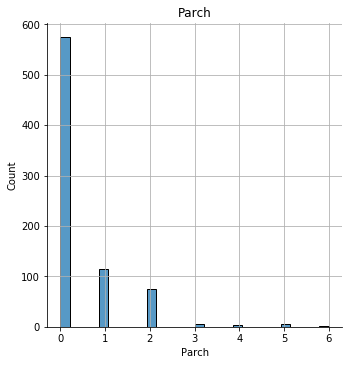

In [20]:
# Distribution of numerical variables
for col in numerical_variables:
    sns.displot(data_df, x=col)
    plt.title(col)
    plt.grid()
plt.show()

In [21]:
#data_df[data_df['Fare']==0, 'Fare'] =1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a60c4e0>]],
      dtype=object)

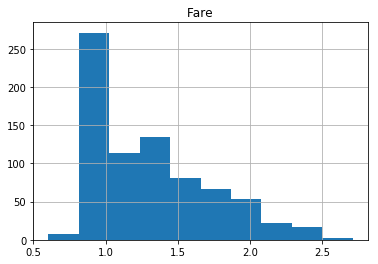

In [22]:
aa = np.log10(data_df[['Fare']])
aa[aa['Fare']>0].hist()

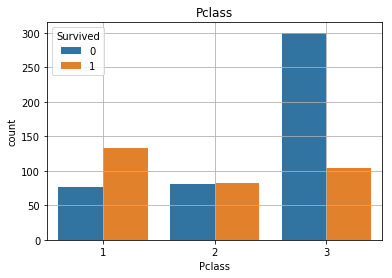

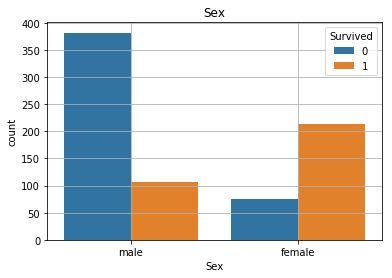

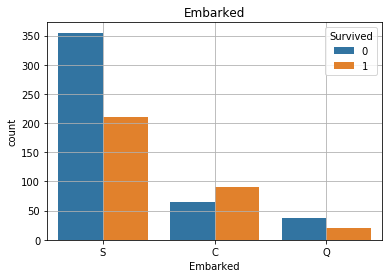

In [23]:
# Categorical Variables wrt Target variable
for col in categorical_variables:
    plt.figure()
    sns.countplot(x=col, hue=y_column, data=data_df)
    plt.title(col)
    plt.grid(b=True)
plt.show()

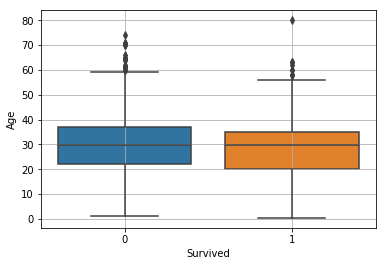

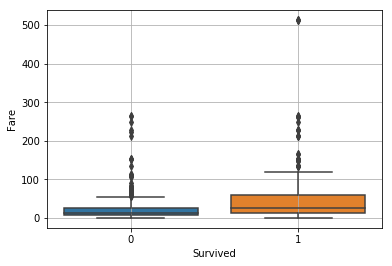

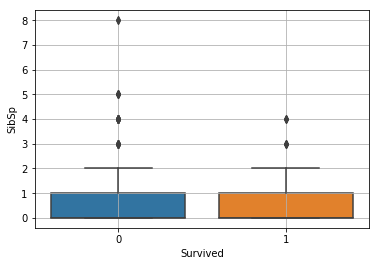

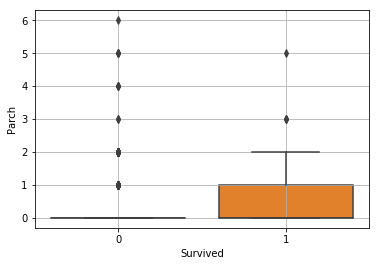

In [24]:
# Numerical Variables wrt Target Variable
for col in numerical_variables:
    plt.figure()
    sns.boxplot(data=data_df, x=y_column, y=col)
    plt.grid(b= True)
plt.show()


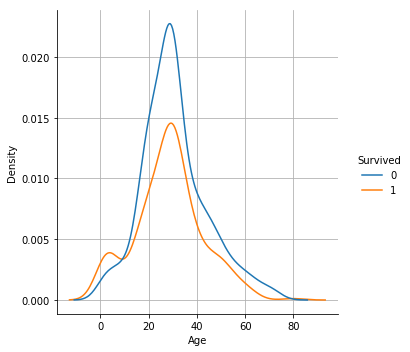

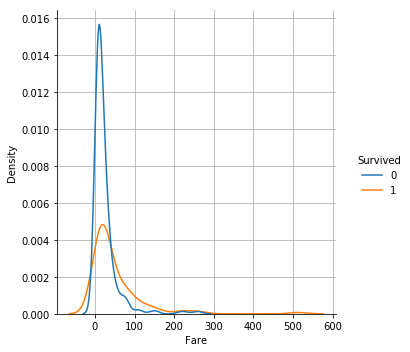

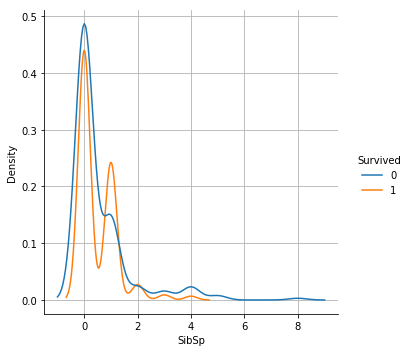

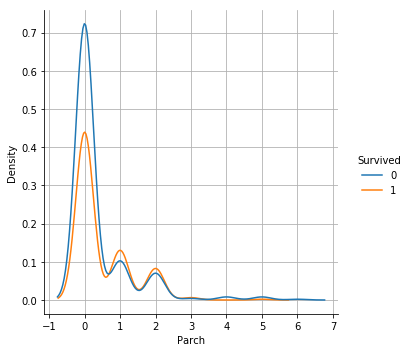

In [25]:
# Plot the distribution of the target variable wrt categorical variables
for col in numerical_variables:
    sns.displot(data_df, x=col, hue=y_column, kind="kde")
    plt.grid()
plt.show()

## Feature Transformation/ Scaling

In [26]:
list_of_cols

['Survived', 'Pclass', 'Sex', 'Embarked', 'Age', 'Fare', 'SibSp', 'Parch']

In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  778 non-null    int64  
 1   Pclass    778 non-null    int64  
 2   Sex       778 non-null    object 
 3   Embarked  778 non-null    object 
 4   Age       778 non-null    float64
 5   Fare      778 non-null    float64
 6   SibSp     778 non-null    int64  
 7   Parch     778 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 74.7+ KB


In [28]:
data_df.head(2)

,Survived,Pclass,Sex,Embarked,Age,Fare,SibSp,Parch
0,0,3,male,S,22.0,7.2500,1,0
1,1,1,female,C,38.0,71.2833,1,0


In [29]:
# Feature transformations for each variable

# # Reduce some of dimensions for SibSp and Parch
# data_df.loc[data_df.SibSp>=3, 'SibSp']=3
# data_df.loc[data_df.Parch>=3, 'Parch']=3
# Convert all categorical variables using one-hot encoding
data_df = pd.get_dummies(data_df, columns = categorical_variables)
# For binary column, keep only one of the columns
data_df.drop(labels='Sex_male', axis=1, inplace=True)
data_df.rename({'Sex_female': 'Sex'}, axis=1, inplace=True)
# Fare - Find log
min_fare = data_df[data_df.Fare!=0].Fare.min()
data_df.loc[data_df.Fare==0, 'Fare']=min_fare
data_df.Fare = np.log10(data_df.Fare)

In [30]:
# Feature Scaling for numerical variables
for col in ['Age', 'Fare']:
    data_df[col] = StandardScaler().fit_transform(data_df[col].to_numpy().reshape(-1,1))
    print('{} Mean is {} and Std is {}'.format(col, data_df[col].mean(), data_df[col].std()))
for col in ['Parch', 'SibSp']:
    data_df[col] = MinMaxScaler().fit_transform(data_df[col].to_numpy().reshape(-1,1))
    print('{} Min is {} and Max is {}'.format(col, data_df[col].min(), data_df[col].max()))

Age Mean is 2.739882014499101e-17 and Std is 1.000643293730089
Fare Mean is -5.502596379119028e-16 and Std is 1.000643293730089
Parch Min is 0.0 and Max is 1.0
SibSp Min is 0.0 and Max is 1.0


In [31]:
data_df.head()

,Survived,Age,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.566794,-1.059370,0.125,0.0,0,0,1,0,0,0,1
1,1,0.604016,1.329257,0.125,0.0,1,0,0,1,1,0,0
2,1,-0.274091,-0.966339,0.000,0.0,0,0,1,1,0,0,1
3,1,0.384489,1.021505,0.125,0.0,1,0,0,1,0,0,1
4,0,0.384489,-0.949984,0.000,0.0,0,0,1,0,0,0,1


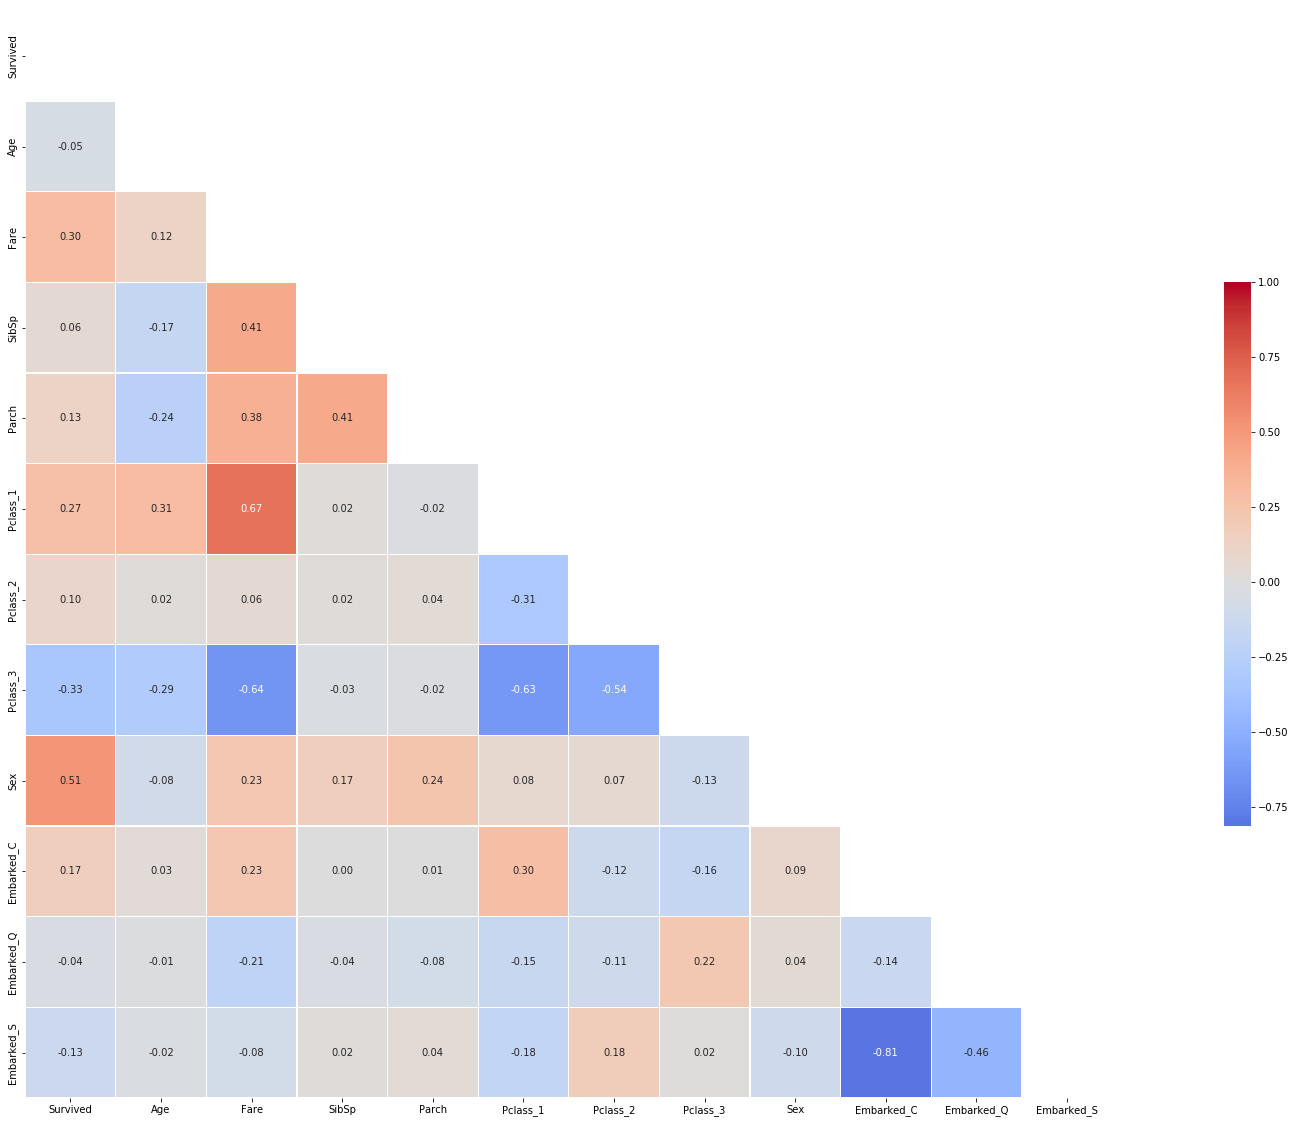

In [36]:
# Do correlation analysis
# Now that we have converted everything to numerical variables, do a correlation analysis again
data_dt_num_xcorr = data_df.corr(method='spearman')

plt.figure(figsize=(40,20))
# sns.heatmap(data_dt_num_xcorr, vmax=1.0, center=0, fmt='.2f',
#                 square=True, linewidths=.2, annot=True, cmap=sns.diverging_palette(240,10,as_cmap=True))


# Mask for the upper triangle
mask = np.zeros_like(data_dt_num_xcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_dt_num_xcorr, vmax=1.0, center=0, fmt='.2f',mask=mask, 
                square=True, linewidths=.2, annot=True, cmap='coolwarm', cbar_kws={"shrink": .5})
plt.show()

## Model Building and Analysis

In [225]:
data_train_x,data_test_x, data_train_y,data_test_y = train_test_split(data_df.drop(labels=y_column,axis=1),
                                                                      data_df[[y_column]],test_size=0.20,\
                                                                      stratify=data_df[y_column].values)
print(len(data_train_x), len(data_test_x))
print(len(data_train_y), len(data_test_y))

622 156
622 156


Cross-validated Confusion Matrix on training data is:
[[286  80]
 [ 60 196]]
Confusion Matrix for test data is
[[65 27]
 [13 51]]
Classification Report for Test Data
              precision    recall  f1-score   support

           0     0.8333    0.7065    0.7647        92
           1     0.6538    0.7969    0.7183        64

    accuracy                         0.7436       156
   macro avg     0.7436    0.7517    0.7415       156
weighted avg     0.7597    0.7436    0.7457       156

ROC of the Classifier is 0.81946
Accurace of the Classifier is 0.74359


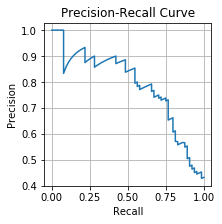

In [226]:
# logistic Regression
reg_model = LogisticRegression(class_weight = 'balanced')\
            .fit(data_train_x, data_train_y)
y_train_predict = reg_model.predict(data_train_x)
y_test_predict = reg_model.predict(data_test_x)

print('Cross-validated Confusion Matrix on training data is:')
print(metrics.confusion_matrix(data_train_y, y_train_predict))
print('Confusion Matrix for test data is')
print(metrics.confusion_matrix(data_test_y, y_test_predict))

print('Classification Report for Test Data')
print(metrics.classification_report(data_test_y, y_test_predict, digits=4))
predicted_prob = reg_model.predict_proba(data_test_x)[:,1]

LR_ROC = metrics.roc_auc_score(data_test_y, predicted_prob)
print('ROC of the Classifier is %.5f'%LR_ROC)

LR_Acc = metrics.accuracy_score(data_test_y, predicted_prob>0.5)
print('Accuracy of the Classifier is %.5f'%LR_Acc)

precision, recall, thresholds = metrics.precision_recall_curve(data_test_y, predicted_prob)

#create precision recall curve
plt.figure()
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid(b=True)
plt.show()



In [227]:
data_test_x.head()

,Age,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked_C,Embarked_Q,Embarked_S
339,1.116245,0.600722,0.000,0.0,1,0,0,0,0,0,1
103,0.238138,-0.874351,0.000,0.0,0,0,1,0,0,0,1
137,0.530840,1.021505,0.125,0.0,1,0,0,0,0,0,1
518,0.457665,0.275257,0.125,0.0,0,1,0,1,0,0,1
491,-0.639969,-1.059370,0.000,0.0,0,0,1,0,0,0,1


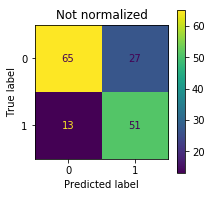

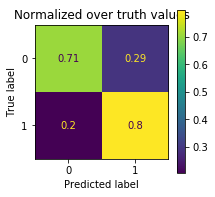

In [228]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(reg_model, data_test_x, data_test_y)
plt.title("Not normalized");
plot_confusion_matrix(reg_model, data_test_x, data_test_y, normalize='true')
plt.title("Normalized over truth values");

plt.show()

In [229]:
# Look at feature importances
def plot_feature_importances(importance_values, labels):
    """
    Plots sorted feature importances
    importance_values: importance of different features
    labels: Feature labels
    """
    sorted_idx = importance_values.argsort()
    indices = np.arange(0, len(labels)) + 0.5
    plt.barh(indices, importance_values[sorted_idx])
    plt.yticks(indices, labels[sorted_idx])
    plt.grid(b=True)
    plt.ylim((0, len(labels)))

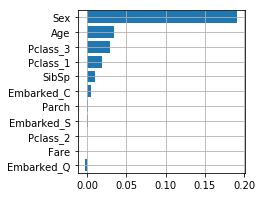

In [230]:
# Feature importances
lr_importance = permutation_importance(reg_model, data_test_x, data_test_y, scoring='roc_auc', 
                       n_repeats=10, random_state=0)
plot_feature_importances(lr_importance.importances_mean, data_test_x.columns )

In [231]:
## Train a set of models

Text(0.5,1,'Test')

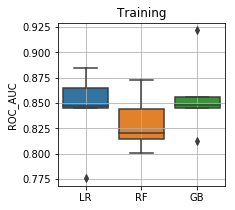

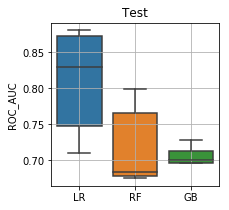

In [232]:
from sklearn.model_selection import StratifiedKFold, cross_val_score 
from sklearn.base import clone

clfs = [LogisticRegression(class_weight = 'balanced'),
        RandomForestClassifier(class_weight='balanced'),
        GradientBoostingClassifier()]

clf_names = ['LR', 'RF', 'GB']

# Stratified cross validation using 5 folds
cv = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)

# Preset scores for all methods
all_scores_train = np.zeros((len(clf_names), cv.n_splits))
all_scores_test = np.zeros((len(clf_names), cv.n_splits))

for i in range(len(clfs)):
    clf = clone(clfs[i])
    scores_train = cross_val_score(clf, data_train_x, data_train_y,  cv=cv, scoring='roc_auc')
    all_scores_train[i] = scores_train
    scores_test = cross_val_score(clf, data_test_x, data_test_y,  cv=cv, scoring='roc_auc')
    all_scores_test[i] = scores_test
    
plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_train.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('ROC_AUC')
plt.title('Training')

plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_test.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('ROC_AUC')
plt.title('Test')

In [233]:
all_scores_test

array([[0.71052632, 0.87280702, 0.88034188, 0.82905983, 0.74786325],
       [0.67813765, 0.76535088, 0.68376068, 0.7991453 , 0.67521368],
       [0.70040486, 0.72807018, 0.6965812 , 0.6965812 , 0.71367521]])

In [234]:
data_df.columns

Index(['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Some Iterations by removing some variables

In [235]:
cols_to_drop=['Pclass_1', 'Pclass_2', 'Pclass_3','Embarked_C', 'Embarked_Q', 'Embarked_S', y_column ]
data_train_x,data_test_x, data_train_y,data_test_y = train_test_split(data_df.drop(labels=cols_to_drop,axis=1),
                                                                      data_df[[y_column]],test_size=0.20,\
                                                                      stratify=data_df[y_column].values)
print(len(data_train_x), len(data_test_x))
print(len(data_train_y), len(data_test_y))

622 156
622 156


Text(0.5,1,'Test')

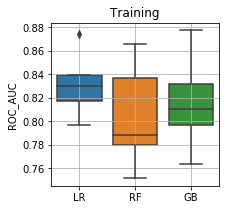

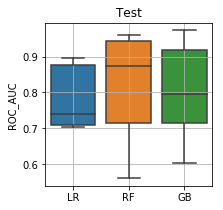

In [236]:
from sklearn.model_selection import StratifiedKFold, cross_val_score 
from sklearn.base import clone

clfs = [LogisticRegression(class_weight = 'balanced'),
        RandomForestClassifier(class_weight='balanced'),
        GradientBoostingClassifier()]

clf_names = ['LR', 'RF', 'GB']

# Stratified cross validation using 5 folds
cv = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)

# Preset scores for all methods
all_scores_train = np.zeros((len(clf_names), cv.n_splits))
all_scores_test = np.zeros((len(clf_names), cv.n_splits))

for i in range(len(clfs)):
    clf = clone(clfs[i])
    scores_train = cross_val_score(clf, data_train_x, data_train_y,  cv=cv, scoring='roc_auc')
    all_scores_train[i] = scores_train
    scores_test = cross_val_score(clf, data_test_x, data_test_y,  cv=cv, scoring='roc_auc')
    all_scores_test[i] = scores_test
    
plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_train.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('ROC_AUC')
plt.title('Training')

plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_test.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('ROC_AUC')
plt.title('Test')